In [4]:
import numpy as np
X = 2+ np.random.rand(100,1)
y = 4+3*X + np.random.rand(100,1)

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best 


array([[4.83119914],
       [2.88525118]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.83119914],
       [10.6017015 ]])

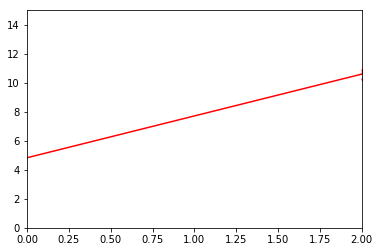

In [8]:
import matplotlib.pyplot as plt

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'r.')
plt.axis([0,2,0,15])
plt.show()


In [9]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

lin_reg.predict(X_new)



array([[ 4.83119914],
       [10.6017015 ]])

In [15]:

## 批量梯度下降
eta = 0.1
n_interations = 1000
m=100
theta = np.random.rand(2,1)

for interation in range(n_interations):
    gradiens = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theat = theta - eta * gradiens



## 随机梯度下降
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m +i)
        theta = theta-eta * gradients


In [16]:
theta

array([[3.28065252],
       [3.4917219 ]])

In [17]:

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50,penalty = None,eta0 = 0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([3.5286969]), array([3.39065706]))

In [21]:

## 多项式回归
m=100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X**2 + X+2 + np.random.randn(m,1)

from sklearn.preprocessing import PolynomialFeatures
Poly_features = PolynomialFeatures(degree = 2,include_bias = False)
X_poly = Poly_features.fit_transform(X)
X[0]

X_poly[0]


array([2.88865521, 8.34432893])

In [22]:

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_


(array([1.87468193]), array([[1.03689959, 0.55859447]]))

In [24]:

## 学习曲线
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label = 'train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth =3,label = 'val')



In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

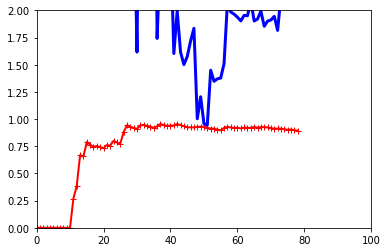

In [36]:

from sklearn.pipeline import Pipeline

ploynomial_regression = Pipeline((
  ('Poly_features',PolynomialFeatures(degree=10,include_bias= False)),
  ('sgd_reg',LinearRegression()),
))
plot_learning_curves(ploynomial_regression,X,y)
plt.ylim((0,2))
plt.xlim((0,100))
plt.show()

In [38]:

## 岭回归
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1,solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

#

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.48357196])

In [41]:
## LASSO 回归
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y.ravel())
lasso_reg.predict([[1.5]])


array([5.2529674])

In [44]:

##弹性网络
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])


array([5.24875999])

In [46]:


# 早期停止法

from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter =1,warm_start =True,penalty = None,learning_rate ='constant',eta0=0.005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    if val_error<minimum_val_error :
        minimum_val_error = val_error
        best_epoch=epoch
        best_model = clone(sgd_reg)


NameError: name 'X_train_poly_scaled' is not defined

In [49]:

## 逻辑回归
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [54]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)

In [55]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

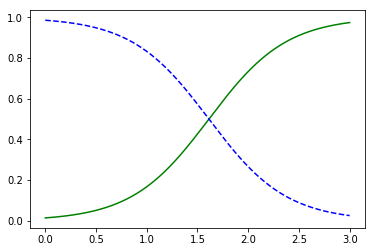

In [59]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label = 'Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not Iris-Visginica')
plt.show()

In [60]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [62]:

X = iris['data'][:,(2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs',C=1)
softmax_reg.fit(X,y)


softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[2.42794737e-04, 2.14966717e-01, 7.84790488e-01]])